In [4]:
import warnings
warnings.filterwarnings('ignore')

### Typical Neural Network Model

<img src="images/artificial-neural-network-model.png">

A basic neural network consists of an input layer, which is just your data, in numerical form. After your input layer, you will have some number of what are called "hidden" layers. A hidden layer is just in between your input and output layers. One hidden layer means you just have a neural network. Two or more hidden layers? Boom, you've got a deep neural network!

Why is this? Well, if you just have a single hidden layer, the model is going to only learn linear relationships.

If you have many hidden layers, you can begin to learn non-linear relationships between your input and output layers.

### A single neuron might look as follows:

<img src="images/artificial-neuron-model-sigmoid-activiation-function.png">

The idea is a single neuron is just sum of all of the inputs x weights, fed through some sort of activation function. The activation function is meant to simulate a neuron firing or not. A simple example would be a stepper function, where, at some point, the threshold is crossed, and the neuron fires a 1, else a 0. Let's say that neuron is in the first hidden layer, and it's going to communicate with the next hidden layer. So it's going to send it's 0 or a 1 signal, multiplied by the weights, to the next neuron, and this is the process for all neurons and all layers.

The mathematical challenge for the artificial neural network is to best optimize thousands or millions or whatever number of weights you have, so that your output layer results in what you were hoping for. Solving for this problem, and building out the layers of our neural network model is exactly what TensorFlow is for. TensorFlow is used for all things "operations on tensors." A tensor in this case is nothing fancy. It's a multi-dimensional array.

##### To install TensorFlow, simply do a:

<code>pip install --upgrade tensorflow</code>

In [5]:
import tensorflow as tf

print(tf.__version__)

1.14.0


Once we've got tensorflow imported, we can then begin to prepare our data, model it, and then train it. For the sake of simplicity, we'll be using the most common "hello world" example for deep learning, which is the mnist dataset. It's a dataset of hand-written digits, 0 through 9. It's 28x28 images of these hand-written digits. We will show an example of using outside data as well, but, for now, let's load in this data:

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 27s 2us/step


Neural networks are exceptionally good at fitting to data, so much so that they will commonly over-fit the data. Our real hope is that the neural network doesn't just memorize our data and that it instead "generalizes" and learns the actual problem and patterns associated with it.

Let's look at this actual data:

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

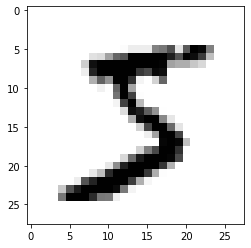

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

The value for y_train with the same index

In [12]:
print(y_train[0])

5


It's generally a good idea to "normalize" your data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function:

In [13]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

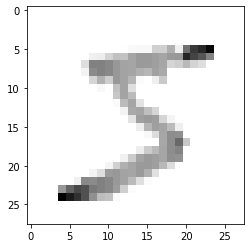

In [14]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

Alright, still a 5. Now let's build our model!

In [15]:
model = tf.keras.models.Sequential()

A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model. No going backwards...for now.

Now, we'll pop in layers. Recall our neural network image? Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

In [16]:
model.add(tf.keras.layers.Flatten())

This will serve as our input layer. It's going to take the data we throw at it, and just flatten it for us. Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. Just like our image.

In [17]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


This layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start.

Let's add another identical layer for good measure.

In [18]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Now, we're ready for an output layer:

In [19]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. Great, our model is done.

Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Remember why we picked relu as an activation function? Same thing is true for the Adam optimizer. It's just a great default to start with.

Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

In [21]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2626 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1066 - acc: 0.9674
Epoch 3/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0731 - acc: 0.9777


As we train, we can see loss goes down (yay), and accuracy improves quite quickly to 98-99% (double yay!)

Now that's loss and accuracy for in-sample data. Getting a high accuracy and low loss might mean your model learned how to classify digits in general (it generalized)...or it simply memorized every single example you showed it (it overfit). This is why we need to test on out-of-sample data (data we didn't use to train the model).

In [22]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0967 - acc: 0.9710
0.09668987652314827
0.971


### Summarizing What We Have Done Till Now (Run this yourself)

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   #10 because dataset is numbers from 0 - 9

In [24]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2651 - acc: 0.9220
Epoch 2/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1074 - acc: 0.9671
Epoch 3/3
10000/10000 [==============================] - 0s 37us/sample - loss: 0.1004 - acc: 0.9679
0.10041759407222271
0.9679


In [ ]:
model.save('epic_num_reader.model')

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [ ]:
predictions = new_model.predict(x_test)

In [ ]:
print(predictions)

That sure doesn't start off as helpful, but recall these are probability distributions. We can get the actual number pretty simply:

In [ ]:
import numpy as np

print(np.argmax(predictions[0]))

In [ ]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()